In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
data=pd.read_csv('Advertising.csv',index_col=0)

In [22]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# Data Preprocessing 

Text(0.5, 1.0, 'sales vs tv advertising')

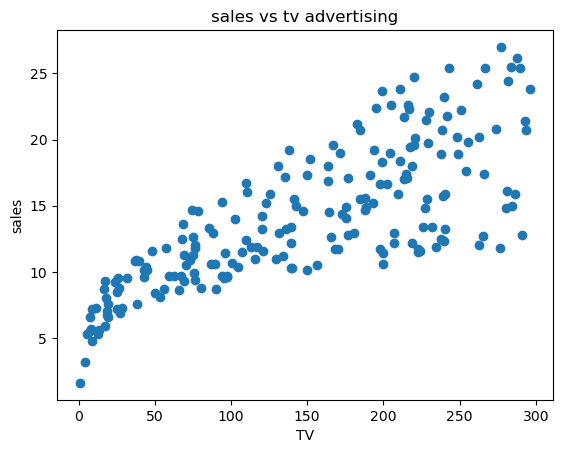

In [23]:
plt.scatter(data['TV'],data['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('sales vs tv advertising')

Text(0.5, 1.0, 'sales vs radio advertising')

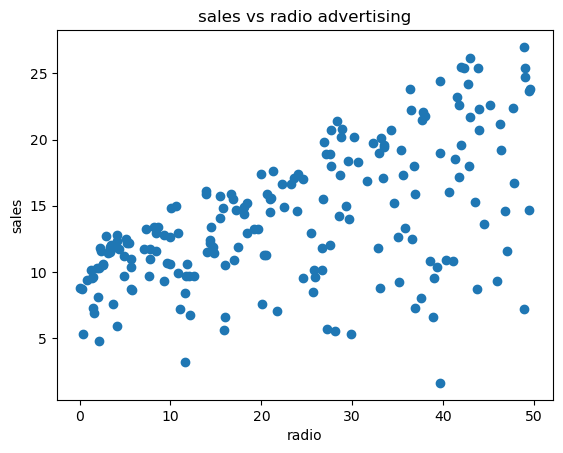

In [24]:
plt.scatter(data['radio'],data['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('sales vs radio advertising')

Text(0.5, 1.0, 'sales vs newspaper advertising')

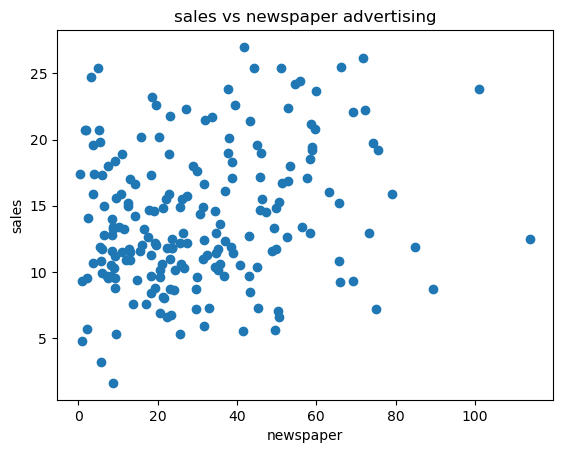

In [25]:
plt.scatter(data['newspaper'],data['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('sales vs newspaper advertising')

In [26]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<Axes: >

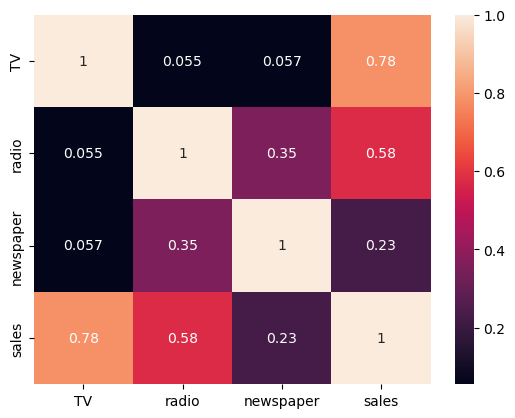

In [27]:
sns.heatmap(data.corr(),annot=True)

In [28]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f665cb4dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f665ce99d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f665c70c90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f665ceaa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f665ce9550>],
 'means': []}

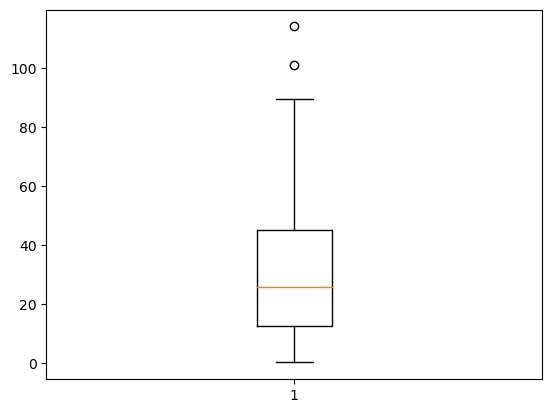

In [31]:
plt.boxplot(data['newspaper']) # to ind the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f665c7ec90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f665dd3d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f665dd2310>],
 'medians': [<matplotlib.lines.Line2D at 0x1f665de0e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f665de15d0>],
 'means': []}

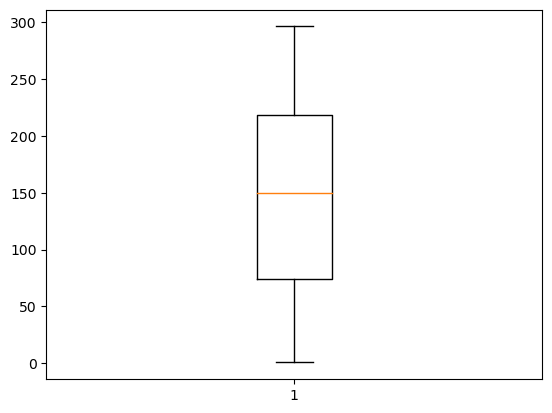

In [33]:
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f665f94290>,
 'caps': [<matplotlib.lines.Line2D at 0x1f665f95510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f665f83a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f665f96490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f665f96bd0>],
 'means': []}

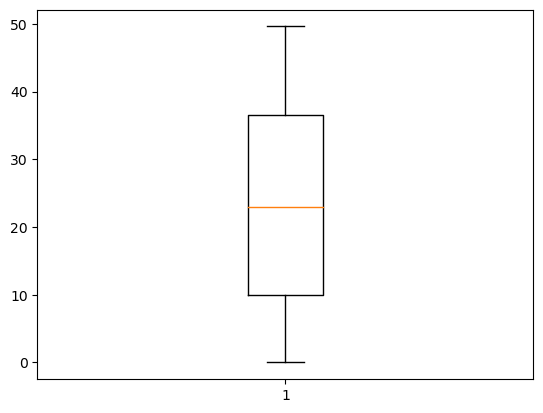

In [34]:
plt.boxplot(data['radio'])

# linear regression = y=b0+b1x1

In [35]:
x=data[['TV','radio','newspaper']]
y=data[['sales']]

In [36]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [38]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [42]:
print("shape of x ",x.shape)
print("shape of y ",y.shape)

shape of x  (200, 3)
shape of y  (200, 1)


In [43]:
print("the shape of x-train ",x_train.shape)
print("the shape of x-test ",x_test.shape)
print("the shape of y-train ",y_train.shape)
print("the shape of y-test ",y_test.shape)

the shape of x-train  (160, 3)
the shape of x-test  (40, 3)
the shape of y-train  (160, 1)
the shape of y-test  (40, 1)


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()

In [47]:
model=lm.fit(x_train,y_train)

In [48]:
print(lm.coef_) #b1 ,b2 , b3

[[0.04316777 0.19319426 0.00279595]]


In [50]:
print(lm.intercept_) #b0

[3.12470464]


In [51]:
#y=b0 + b1x1 +b2x2 +b3x3

In [52]:
bzero=3.12470464

In [53]:
bone=0.04316777 

In [54]:
btwo=0.19319426 

In [55]:
bthree=0.00279595

In [56]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [57]:
y=bzero + bone*177 + btwo*9.3 + bthree*6.4

In [58]:
y

12.580000628

In [60]:
y_pred=lm.predict(x_test)

In [61]:
y_pred

array([[10.24548162],
       [ 6.73498031],
       [11.03902103],
       [10.8850127 ],
       [13.27574985],
       [ 9.57337541],
       [13.4411277 ],
       [20.33985021],
       [ 6.33501772],
       [23.21348564],
       [ 7.11561723],
       [16.48141117],
       [17.13351658],
       [23.07862184],
       [19.16321387],
       [13.15715983],
       [10.7109733 ],
       [21.04075504],
       [20.63313034],
       [17.46305488],
       [14.14150376],
       [13.87837739],
       [10.09631245],
       [20.74195924],
       [16.19578474],
       [17.24292327],
       [18.44931302],
       [ 9.2943728 ],
       [17.32629149],
       [ 6.61865773],
       [23.21469468],
       [10.82973955],
       [20.09683654],
       [ 4.74763877],
       [24.0478577 ],
       [12.54678708],
       [14.15379674],
       [ 7.90250374],
       [19.47934196],
       [18.45478833]])

In [63]:
new_df= pd.DataFrame()
new_df=x_test
new_df['actual sales']=y_test
new_df['predicted sales']=y_pred
new_df

,TV,radio,newspaper,actual sales,predicted sales
145,96.2,14.8,38.9,11.4,10.245482
183,56.2,5.7,29.7,8.7,6.734980
165,117.2,14.7,5.4,11.9,11.039021
159,11.7,36.9,45.2,7.3,10.885013
116,75.1,35.0,52.7,12.6,13.275750
146,140.3,1.9,9.0,10.3,9.573375
17,67.8,36.6,114.0,12.5,13.441128
40,228.0,37.7,32.0,21.5,20.339850
190,18.7,12.1,23.4,6.7,6.335018
148,243.2,49.0,44.3,25.4,23.213486


In [64]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred) 
print("R-squared: ", r2*100)

rmse=np.sqrt(mean_squared_error(y_test, y_pred)) 
print("RMSE:", rmse)

R-squared:  86.62196330227378
RMSE: 2.2998938734931653


In [65]:
new_df.to_csv('updated.csv')